In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
networkpatterns = pd.read_csv('network_traffic_data_extended.csv')
networkpatterns.head(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,Normal
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,Normal
2,2024-12-01 00:01:10,1524,9774,http,4.15,Flood
3,2024-12-01 00:00:18,3682,3911,https,60.60,Normal
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,Flood
5,2024-12-01 00:02:15,3711,7459,https,28.54,Normal
6,2024-12-01 00:05:36,206,2715,ftp,42.84,Normal
7,2024-12-01 00:02:06,2647,3627,dns,34.32,Normal
8,2024-12-01 00:00:48,6324,1684,icmp,84.90,Normal
9,2024-12-01 00:05:51,4433,811,ftp,46.48,Normal


In [4]:
networkpatterns.tail(10)

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
740,2024-12-03 00:30:20,5297,7826,tcp,90.32,Normal
741,2024-12-03 01:22:15,643,10540,dns,41.03,Flood
742,2024-12-03 00:09:28,3655,3410,udp,97.51,Normal
743,2024-12-03 01:52:01,7871,5299,udp,55.17,Normal
744,2024-12-03 01:21:36,7754,3004,icmp,8.81,Normal
745,2024-12-03 02:25:00,11347,9177,dns,55.16,Flood
746,2024-12-03 00:46:14,9003,4030,http,22.99,Flood
747,2024-12-03 01:40:27,6534,466,dns,57.67,Normal
748,2024-12-03 00:56:44,8543,4959,icmp,7.10,Flood
749,2024-12-03 02:09:08,4883,8167,tcp,12.90,Flood


In [5]:
networkpatterns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           750 non-null    object 
 1   bandwidth_in (kb)   750 non-null    int64  
 2   bandwidth_out (kb)  750 non-null    int64  
 3   jenis_probo         750 non-null    object 
 4   ping                750 non-null    float64
 5   label               750 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 35.3+ KB


In [6]:
networkpatterns['label'] = networkpatterns['label'].map({'Normal': 0, 'Flood': 1}) 
networkpatterns

,timestamp,bandwidth_in (kb),bandwidth_out (kb),jenis_probo,ping,label
0,2024-12-01 00:00:00,1924,509,ftp,28.23,0
1,2024-12-01 00:00:15,2386,1779,ftp,74.33,0
2,2024-12-01 00:01:10,1524,9774,http,4.15,1
3,2024-12-01 00:00:18,3682,3911,https,60.60,0
4,2024-12-01 00:02:24,3357,11831,ftp,70.43,1
...,...,...,...,...,...,...
745,2024-12-03 02:25:00,11347,9177,dns,55.16,1
746,2024-12-03 00:46:14,9003,4030,http,22.99,1
747,2024-12-03 01:40:27,6534,466,dns,57.67,0
748,2024-12-03 00:56:44,8543,4959,icmp,7.10,1


In [12]:
x_networkpatterns = networkpatterns[['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']]
y_networkpatterns = networkpatterns['label']

In [14]:
# Splitting Dataset menjadi Data Training dan Data Testing
X_networkpatterns_train, X_networkpatterns_test, y_networkpatterns_train, y_networkpatterns_test = train_test_split(x_networkpatterns, y_networkpatterns, test_size=0.2, random_state=42, stratify=y_networkpatterns)

In [16]:
sc_networkpatterns = StandardScaler()
X_networkpatterns_train = sc_networkpatterns.fit_transform(X_networkpatterns_train)
X_networkpatterns_test = sc_networkpatterns.transform(X_networkpatterns_test)

In [17]:
print("Dataset yang digunakan untuk training sebanyak: ", X_networkpatterns_train.shape[0], "baris data")
print(pd.DataFrame(X_networkpatterns_train, columns= ['bandwidth_in (kb)', 'bandwidth_out (kb)', 'ping']))

Dataset yang digunakan untuk training sebanyak:  600 baris data
     bandwidth_in (kb)  bandwidth_out (kb)      ping
0             0.613416            0.311066  0.038004
1            -1.406783           -0.696912 -1.118426
2             1.324534            1.047588  1.068401
3            -1.598180            0.517602  1.083753
4            -1.392037           -0.590341 -1.454394
..                 ...                 ...       ...
595           1.678437           -0.863807 -1.046305
596          -1.495861           -0.763555  0.834901
597          -0.572281            1.521846  0.509644
598          -0.351091            0.369378 -0.095169
599           0.221895            0.224315 -1.509020

[600 rows x 3 columns]


In [18]:
# Mencari nilai K yang optimal
ER_networkpatterns = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_networkpatterns_train, y_networkpatterns_train)
    y_pred = knn.predict(X_networkpatterns_test)
    ER_networkpatterns.append(1 - accuracy_score(y_networkpatterns_test, y_pred))

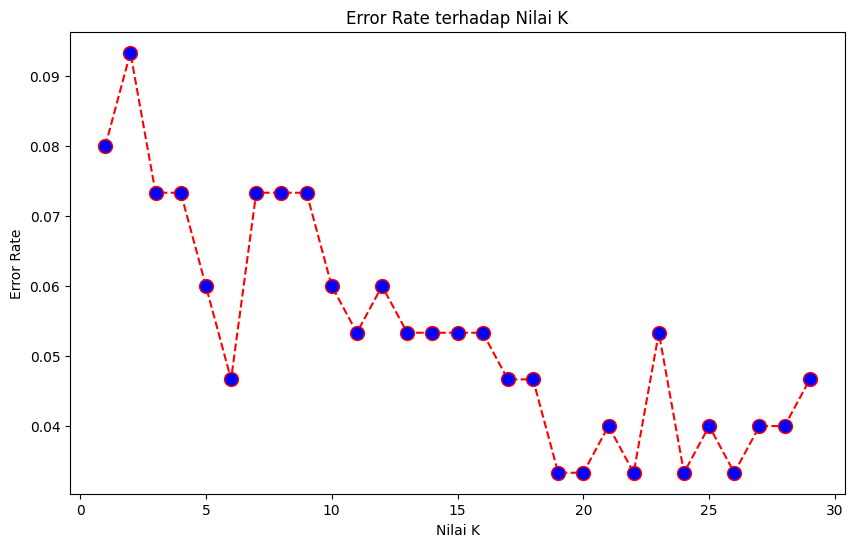

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, ER_networkpatterns, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.title('Error Rate terhadap Nilai K')
plt.show()

In [22]:
#Mencoba Prosedur Pelatihan Model dengan Algoritma KNN
k_optimal = 1
knn = KNeighborsClassifier(n_neighbors=k_optimal)
knn.fit(X_networkpatterns_train, y_networkpatterns_train)
y_networkpatterns_pred = knn.predict(X_networkpatterns_test)

In [23]:
#Pembuatan Prediksi dari Nilai K
pred_K1_networkpatterns = accuracy_score(y_networkpatterns_test, y_networkpatterns_pred)

In [ ]:
#Melihat hasil prediksi dari nilai K 1
print(f'Akurasi dengan k = {k_optimal} : {pred_K1_networkpatterns * 100:.2f}%')